<a href="https://colab.research.google.com/github/Shridat/Transportation/blob/main/Transportation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/train_revised.csv')
data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
data[['day','month','year']] = data['travel_date'].str.split('-',expand=True).astype('int')

In [ ]:
data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day,month,year
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,17,10,17
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,19,11,17
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,26,11,17
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,27,11,17
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,27,11,17


In [ ]:
data[['hrs','mins']] = data['travel_time'].str.split(':',expand=True).astype('int')

In [ ]:
final_data = data.drop(['ride_id','seat_number','payment_receipt','travel_date','travel_time'],axis=1)

In [ ]:
data['payment_method'].unique()

array(['Mpesa', 'Cash'], dtype=object)

In [ ]:
data['travel_to'].unique()

array(['Nairobi'], dtype=object)

In [ ]:
data['travel_from'].unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

In [ ]:
final_data.isnull().sum()

payment_method    0
travel_from       0
travel_to         0
car_type          0
max_capacity      0
day               0
month             0
year              0
hrs               0
mins              0
dtype: int64

In [ ]:
final_data.shape

(51645, 10)

In [ ]:
final_data=final_data.dropna(axis=0)

In [ ]:
final_data.shape

(51645, 10)

In [ ]:
final_data.isnull().sum()

payment_method    0
travel_from       0
travel_to         0
car_type          0
max_capacity      0
day               0
month             0
year              0
hrs               0
mins              0
dtype: int64

In [ ]:
final_data.head()

,payment_method,travel_from,travel_to,car_type,max_capacity,day,month,year,hrs,mins
0,Mpesa,Migori,Nairobi,Bus,49,17,10,17,7,15
1,Mpesa,Migori,Nairobi,Bus,49,19,11,17,7,12
2,Mpesa,Keroka,Nairobi,Bus,49,26,11,17,7,5
3,Mpesa,Homa Bay,Nairobi,Bus,49,27,11,17,7,10
4,Mpesa,Migori,Nairobi,Bus,49,27,11,17,7,12


In [ ]:
correlation = final_data.corr()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


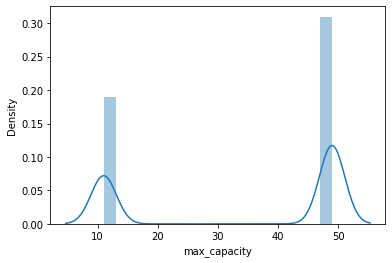

In [ ]:
sns.distplot(final_data['max_capacity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


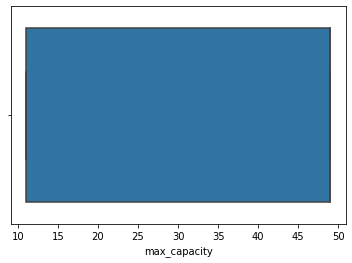

In [ ]:
sns.boxplot(final_data['max_capacity'])

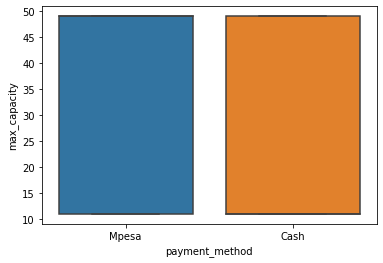

In [ ]:
sns.boxplot(x="payment_method",y="max_capacity",data=final_data)

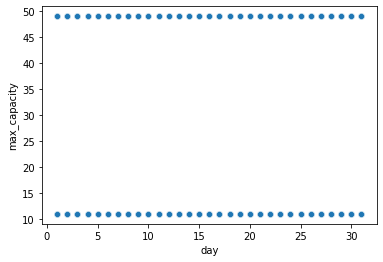

In [ ]:
sns.scatterplot(x="day",y="max_capacity",data=final_data)

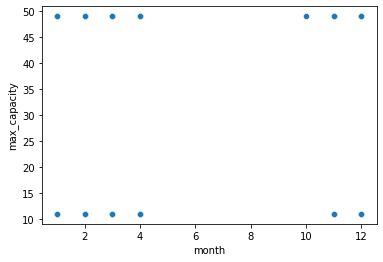

In [ ]:
sns.scatterplot(x="month",y="max_capacity",data=final_data)

In [ ]:
final_data  = final_data.drop(['travel_to'],axis=1)

In [ ]:
final_data.describe()

,max_capacity,day,month,year,hrs,mins
count,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000
mean,34.534321,14.457779,4.961778,17.734727,8.611385,15.780230
std,18.451193,8.140845,4.279107,0.441482,3.682485,15.779524
min,11.000000,1.000000,1.000000,17.000000,5.000000,0.000000
25%,11.000000,8.000000,2.000000,17.000000,7.000000,6.000000
50%,49.000000,14.000000,3.000000,18.000000,7.000000,9.000000
75%,49.000000,20.000000,11.000000,18.000000,9.000000,20.000000
max,49.000000,31.000000,12.000000,18.000000,23.000000,59.000000


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51645 entries, 0 to 51644
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   payment_method  51645 non-null  object
 1   travel_from     51645 non-null  object
 2   car_type        51645 non-null  object
 3   max_capacity    51645 non-null  int64 
 4   day             51645 non-null  int64 
 5   month           51645 non-null  int64 
 6   year            51645 non-null  int64 
 7   hrs             51645 non-null  int64 
 8   mins            51645 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 6.0+ MB


In [ ]:
final_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51645 entries, 0 to 51644
Columns: 9 entries, payment_method to mins
dtypes: int64(6), object(3)
memory usage: 6.0+ MB


In [ ]:
pd.get_dummies(final_data,drop_first=True) 
final_data = pd.get_dummies(final_data,drop_first=True) 

In [ ]:
Y = final_data['max_capacity']
X = final_data.drop(['max_capacity'],axis=1)  

In [ ]:
X.head()

,day,month,year,hrs,mins,payment_method_Mpesa,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,...,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle
0,17,10,17,7,15,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,19,11,17,7,12,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,26,11,17,7,5,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,27,11,17,7,10,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,11,17,7,12,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
Y.head()

0    49
1    49
2    49
3    49
4    49
Name: max_capacity, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred = linear_reg.predict(x_test)
pred

array([11., 49., 49., ..., 49., 49., 49.])

In [ ]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test,pred)
print(mse)

3.051019592801685e-25


In [ ]:
linear_reg.intercept_

49.00000000000131

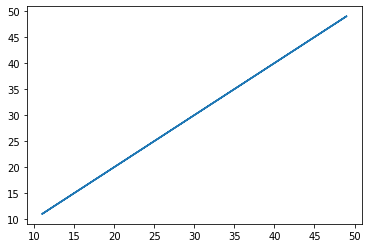

In [ ]:
plt.plot(pred,y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


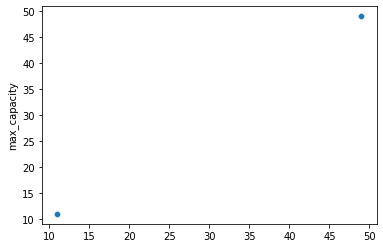

In [ ]:
sns.scatterplot(pred,y_test)

In [ ]:
best_score={}

In [ ]:
best_score['linear_reg'] = mse

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(pred,y_test)

1.0

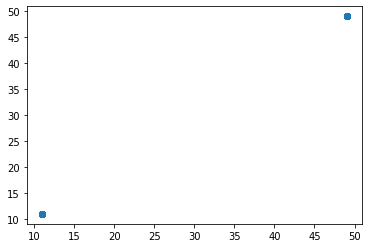

In [ ]:
plt.scatter(y_test,pred)

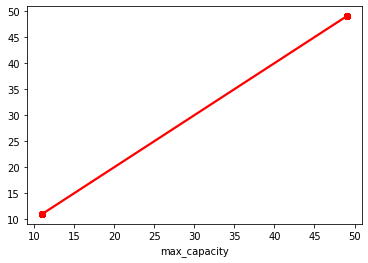

In [ ]:
sns.regplot(x=y_test,y=pred,ci=None,color ='red');